In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
pd.set_option('display.max_columns', None)

2023-05-22 17:07:41.650354: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-22 17:07:41.695958: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-22 17:07:42.419496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# df = pd.read_csv(
#     'predicted_thicknesses/sermeq_aggregated_bootstrap_predictions_parameterization_4.csv'
# )
# df

In [3]:
# np.sqrt(sum(df['Model Variance'])) * sum(df['Area'])

In [4]:
df1 = gl.load_notebook_data(parameterization = '1') # no threshold
df2 = gl.load_notebook_data(parameterization = '2') # 0.25 threshold
df3 = gl.load_notebook_data(parameterization = '3') # 0.50 threshold
df = gl.load_notebook_data(parameterization = '4') # 0.75 threshold

glac = gl.load_training_data(RGI_input = 'y')
glac = glac[['RGIId', 'Thickness']]

df1 = pd.merge(df1, glac, on = 'RGIId', how = 'inner')
df2 = pd.merge(df2, glac, on = 'RGIId', how = 'inner')
df3 = pd.merge(df3, glac, on = 'RGIId', how = 'inner')
df_g = pd.merge(df, glac, on = 'RGIId', how = 'inner')

In [7]:
df = df.dropna()

# Density plot of E&L vs GlaThiDa mean thickness

NameError: name 'df1' is not defined

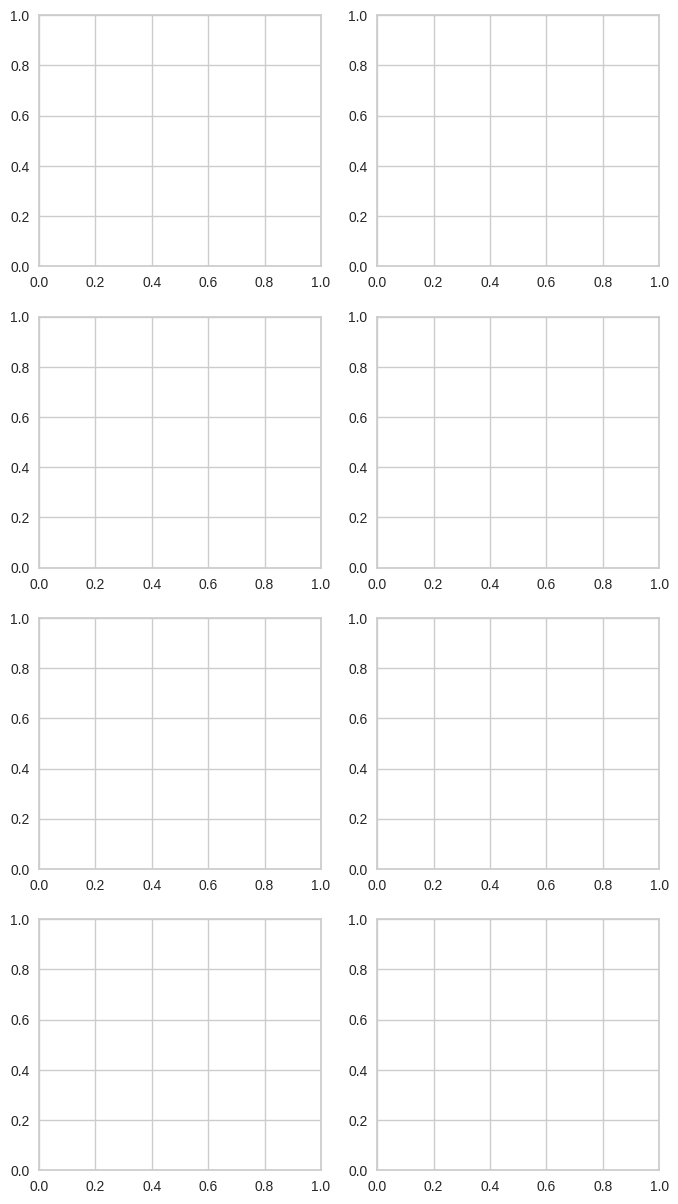

In [49]:
fig, ax = plt.subplots(4,2,figsize = (8,15),
#                        sharex = True, sharey = True
                      )

for n, dataset in enumerate((df1, df2, df3, df4)):
    data = dataset
    if n == 0:
        threshold = 'No Threshold'
    if n == 1:
        threshold = '0.25'
    if n == 2:
        threshold = '0.50'
    if n == 3:
        threshold = '0.75'
#     axs = plt.subplot(4, 1, n+1)

    data_1 = data['Weighted Mean Thickness']
    data_2 = data['Farinotti Mean Thickness']
    data_3 = data['Thickness']


    # data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
    # data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

    print('Sorting data...')
    x_1 = np.sort(data_1)
    y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

    x_2 = np.sort(data_2)
    y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

    x_3 = np.sort(data_3)
    y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

    print('Calculating point density...')
    # Calculate the point density
    xy = np.vstack([np.log10(data_1),np.log10(data_3)])

    z_1 = gaussian_kde(xy)(xy)

    yz = np.vstack([np.log10(data_2),np.log10(data_3)])

    z_2 = gaussian_kde(yz)(yz)
    
    ax[n,0].scatter(
            data['Thickness'],
            data['Weighted Mean Thickness'],
            c = z_1,
            cmap = 'viridis',
            marker = '.'
        )
    ax[n,0].set_xscale('log')
    ax[n,0].set_yscale('log')
    ax[n,0].plot(
        (data['Thickness'].min(), data['Thickness'].max()),
        (data['Thickness'].min(), data['Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
    
#     ax[n,0].set_xlabel('GlaThiDa Survey Thickness (m)')
#     ax[n,0].set_ylabel('Estimated Thickness (m)')
    ax[n,0].set_title('This Study Thickness\nSize and Distance Threshold = ' + threshold,
                     fontsize = 14)
    
    ax[n,1].scatter(
            data['Thickness'],
            data['Farinotti Mean Thickness'],
            c = z_2,
            cmap = 'viridis',
            marker = '.'
        )
    ax[n,1].plot(
        (data['Thickness'].min(), data['Thickness'].max()),
        (data['Thickness'].min(), data['Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
    ax[n,1].set_xscale('log')
    ax[n,1].set_yscale('log')
    ax[n,1].set_title('Farinotti et al. Thickness',
                     fontsize = 14)
    ax[n,0].tick_params(axis="both", labelsize=14)
    ax[n,1].tick_params(axis="both", labelsize=14)
#     ax[n,1].set_xlabel('GlaThiDa Survey Thickness (m)')
#     ax[n,1].set_ylabel('Farinotti Estimated Thickness (m)')
#     ax[n,1].set_title('Farinotti et al. 2019')
    
# plt.suptitle('Comparison of Non-Ice Sheet Glacier Thickness Estimates', y = 0.99)
fig.supylabel('Estimated Thickness (m)', fontsize = 18)
fig.supxlabel('GlaThiDa Survey Thickness (m)', fontsize = 18)

plt.tight_layout()